In [1]:
import json
from urllib.request import urlopen
import urllib
import pandas as pd
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import pickle 

In [2]:
os.chdir("..") 

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.prompt { font-size: 08px !important; }</style>"))
pd.options.display.max_columns = None


In [4]:
data_path = "Data/"

In [5]:
df_final = pd.read_csv(data_path + 'data.csv', sep='\t', encoding='utf-8', )  
df_final.head()

,installments.quantity,installments.rate,id,site_id,title,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,condition,accepts_mercadopago,category_id,is_official_store,catalog_product_id,tags,catalog_listing,seller.id,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.delayed_handling_time.period,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,seller.seller_reputation.metrics.cancellations.period,prices.prices,address.state_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller.seller_reputation.real_level,root_category_id,root_category_name,discount,category_name,categories_from_root
0,12.0,70.17,MLA901948080,MLA,Estéreo Para Auto Pioneer Mvh S215bt Con Usb Y...,12600.0,ARS,1,5,buy_it_now,gold_special,new,1,MLA6867,0,MLA14983192,"['loyalty_discount_eligible', 'brand_verified'...",1,8911722,0,0,"['normal', 'user_info_verified', 'eshop', 'cre...",410.0,30.0,historic,0.01,0.99,0.00,380.0,silver,0.0000,0.0000,0.0,60 days,60 days,63.0,0.0000,0.0,60 days,"[{'id': '17', 'type': 'standard', 'conditions'...",Buenos Aires,1,me2,"['self_service_in', 'mandatory_free_shipping']",drop_off,0,NaN,MLA5725,Accesorios para Vehículos,NaN,Estéreos,"['Accesorios para Vehículos', 'Audio para Vehí..."
1,12.0,70.17,MLA869356478,MLA,Neumático Pirelli Formula Energy 185/60 R14 82h,10250.0,ARS,50,500,buy_it_now,gold_special,new,1,MLA22195,1,MLA15000133,"['brand_verified', 'good_quality_picture', 'go...",1,116026826,0,0,"['brand', 'user_info_verified', 'large_seller'...",22558.0,973.0,historic,0.01,0.96,0.03,21585.0,platinum,0.0041,0.0558,166.0,60 days,60 days,3648.0,0.0044,17.0,60 days,"[{'id': '24', 'type': 'standard', 'conditions'...",Buenos Aires,1,me2,['mandatory_free_shipping'],cross_docking,1,NaN,MLA5725,Accesorios para Vehículos,NaN,Neumáticos de Auto y Camioneta,"['Accesorios para Vehículos', 'Neumáticos', 0 ..."
2,12.0,70.17,MLA862644604,MLA,Casco Para Moto Integral Halcon H57 Negro Tall...,2289.5,ARS,1,250,buy_it_now,gold_special,new,1,MLA4712,0,MLA11386900,"['good_quality_thumbnail', 'loyalty_discount_e...",1,19876329,0,0,"['normal', 'user_info_verified', 'credits_prio...",188730.0,14338.0,historic,0.03,0.94,0.03,174392.0,platinum,0.0166,0.0643,1503.0,60 days,60 days,24591.0,0.0132,351.0,60 days,"[{'id': '6', 'type': 'standard', 'conditions':...",Capital Federal,0,me2,"['self_service_in', 'fs_threshold_mla_change_f...",cross_docking,0,NaN,MLA5725,Accesorios para Vehículos,0.050000,Cascos,"['Accesorios para Vehículos', 'Acc. para Motos..."
3,12.0,70.17,MLA836881964,MLA,Compresor De Aire Alto Impacto Portátil 250 Ps...,1899.0,ARS,500,500,buy_it_now,gold_special,new,1,MLA370797,1,MLA16452983,"['dragged_bids_and_visits', 'good_quality_pict...",0,417972986,0,0,"['brand', 'user_info_verified', 'large_seller'...",364825.0,16464.0,historic,0.03,0.96,0.01,348361.0,platinum,0.0067,0.0000,0.0,60 days,60 days,63441.0,0.0009,62.0,60 days,[{'id': 'c98a86c0-79ec-47a5-8ea4-f605f4c0b369'...,Buenos Aires,0,me2,"['fulfillment', 'fs_threshold_mla_change_feb20...",fulfillment,0,NaN,MLA5725,Accesorios para Vehículos,0.321543,Mini Compresores,"['Accesorios para Vehículos', 'Herramientas', ..."
4,12.0,70.17,MLA851109741,MLA,Carcasa Llave Navaja Peuge

# 1️⃣ Analysis 
---

### discount

In [6]:
df_final[
    (df_final.discount.isna())
].shape

(27134, 52)

In [7]:
df_final_discount = df_final[
    ~(df_final.discount.isna())
]
df_final_discount.shape

(3791, 52)

<AxesSubplot:>

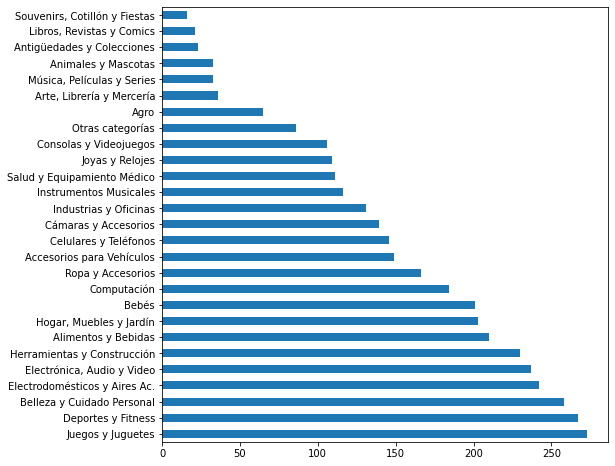

In [8]:
df_final_discount.root_category_name.value_counts().plot.barh(figsize=(8,8))

In [9]:
df_final_discount.dtypes["discount"]
df_final_discount.discount = df_final_discount.discount.apply(pd.to_numeric)

c:\users\a309549\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df_final_discount.groupby("root_category_name").agg({
    'discount': ['mean', 'min', 'max', 'count']
}).sort_values(('discount', 'count'), ascending=False)

discount                          
                                   mean       min       max count
root_category_name                                               
Juegos y Juguetes              0.148903  0.049877  0.583565   273
Deportes y Fitness             0.200562  0.049995  0.600120   267
Belleza y Cuidado Personal     0.233469  0.047157  0.679931   258
Electrodomésticos y Aires Ac.  0.201513  0.049998  0.500042   242
Electrónica, Audio y Video     0.186730  0.005716  0.550250   237
Herramientas y Construcción    0.176934  0.037244  0.720000   230
Alimentos y Bebidas            0.180402  0.026786  0.583194   210
Hogar, Muebles y Jardín        0.186084  0.046549  0.520002   203
Bebés                          0.184366  0.049993  0.616253   201
Computación                    0.214902  0.049960  0.512317   184
Ropa y Accesorios              0.182419  0.049997  0.603656   166
Accesorios para Vehículos      0.179731  0.049998  0.440000   149
Celulares y Teléfonos          0.175375  0.019878  0.617696   146
Cámaras y Accesorios           0.235629  0.049991  0.503333   139
Industrias y Oficinas          0.180544  0.049864  0.684474   131
Instrumentos Musicales         0.150820  0.000000  0.474844   116
Salud y Equipamiento Médico    0.202262  0.050000  0.516753   111
Joyas y Relojes                0.103185  0.050000  0.428857   109
Consolas y Videojuegos         0.168344  0.050000  0.480000   106
Otras categorías               0.098954  0.050000  0.400000    86
Agro                           0.165548  0.049999  0.418333    65
Arte, Librería y Mercería      0.076909  0.049988  0.180000    36
Música, Películas y Series     0.179451  0.050000  0.500000    33
Animales y Mascotas            0.095590  0.050000  0.266071    33
Antigüedades y Colecciones     0.070435  0.050000  0.120000    23
Libros, Revistas y Comics      0.088572  0.050000  0.250000    21
Souvenirs, Cotillón y Fiestas  0.099131  0.049998  0.240000    16

<AxesSubplot:title={'center':'discount'}, xlabel='root_category_name'>

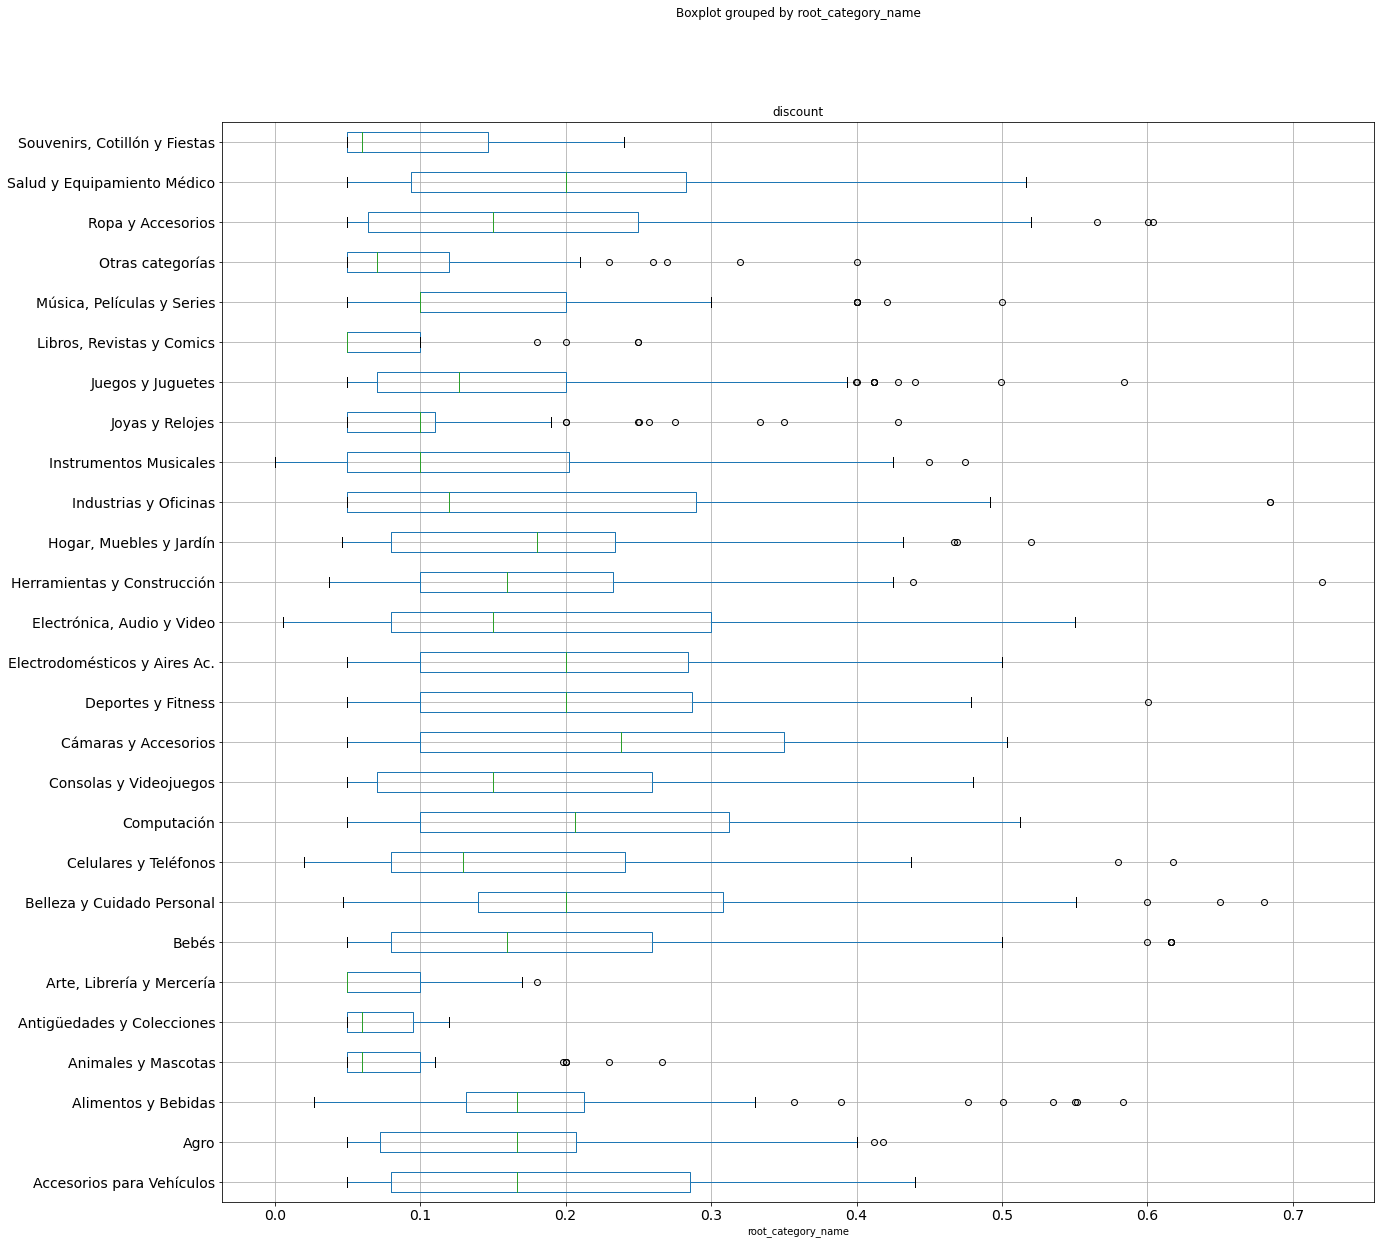

In [11]:
df_final_discount.boxplot(by='root_category_name', column=['discount'], figsize=(20,20), rot=0, vert=False, fontsize=14)


In [12]:
interval_index = pd.interval_range(start=0, end=1, periods=4)
interval_index

IntervalIndex([(0.0, 0.25], (0.25, 0.5], (0.5, 0.75], (0.75, 1.0]],
              closed='right',
              dtype='interval[float64]')

In [13]:
df_final_discount["discount_q"] = pd.cut(df_final_discount['discount'], interval_index,)
df_final_discount.head()


<ipython-input-13-6afa93d0c2fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_discount["discount_q"] = pd.cut(df_final_discount['discount'], interval_index,)


,installments.quantity,installments.rate,id,site_id,title,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,condition,accepts_mercadopago,category_id,is_official_store,catalog_product_id,tags,catalog_listing,seller.id,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.delayed_handling_time.period,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,seller.seller_reputation.metrics.cancellations.period,prices.prices,address.state_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller.seller_reputation.real_level,root_category_id,root_category_name,discount,category_name,categories_from_root,discount_q
2,12.0,70.17,MLA862644604,MLA,Casco Para Moto Integral Halcon H57 Negro Tall...,2289.5,ARS,1,250,buy_it_now,gold_special,new,1,MLA4712,0,MLA11386900,"['good_quality_thumbnail', 'loyalty_discount_e...",1,19876329,0,0,"['normal', 'user_info_verified', 'credits_prio...",188730.0,14338.0,historic,0.03,0.94,0.03,174392.0,platinum,0.0166,0.0643,1503.0,60 days,60 days,24591.0,0.0132,351.0,60 days,"[{'id': '6', 'type': 'standard', 'conditions':...",Capital Federal,0,me2,"['self_service_in', 'fs_threshold_mla_change_f...",cross_docking,0,NaN,MLA5725,Accesorios para Vehículos,0.050000,Cascos,"['Accesorios para Vehículos', 'Acc. para Motos...","(0.0, 0.25]"
3,12.0,70.17,MLA836881964,MLA,Compresor De Aire Alto Impacto Portátil 250 Ps...,1899.0,ARS,500,500,buy_it_now,gold_special,new,1,MLA370797,1,MLA16452983,"['dragged_bids_and_visits', 'good_quality_pict...",0,417972986,0,0,"['brand', 'user_info_verified', 'large_seller'...",364825.0,16464.0,historic,0.03,0.96,0.01,348361.0,platinum,0.0067,0.0000,0.0,60 days,60 days,63441.0,0.0009,62.0,60 days,[{'id': 'c98a86c0-79ec-47a5-8ea4-f605f4c0b369'...,Buenos Aires,0,me2,"['fulfillment', 'fs_threshold_mla_change_feb20...",fulfillment,0,NaN,MLA5725,Accesorios para Vehículos,0.321543,Mini Compresores,"['Accesorios para Vehículos', 'Herramientas', ...","(0.25, 0.5]"
8,12.0,70.17,MLA835929721,MLA,Soporte Respaldo Apoyo Lumbar Masajeador Asien...,700.0,ARS,150,500,buy_it_now,gold_special,new,1,MLA72278,0,NaN,"['brand_verified', 'good_quality_picture', 'go...",0,76226771,0,0,"['normal', 'user_info_verified', 'credits_prio...",13260.0,723.0,historic,0.01,0.98,0.01,12537.0,platinum,0.0076,0.0129,48.0,60 days,60 days,3851.0,0.0014,6.0,60 days,"[{'id': '93', 'type': 'standard', 'conditions'...",Capital Federal,0,me2,"['fulfillment', 'self_service_in']",fulfillment,0,NaN,MLA5725,Accesorios para Vehículos,0.440000,Fundas para Asientos,"['Accesorios para Vehículos', 'Accesorios de A...","(0.25, 0.5]"
12,12.0,70.17,MLA897397255,MLA,Camara Espejo Retrovisor Full Hd + Trasera Est...,2999.0,ARS,1,250,buy_it_now,gold_special,new,1,MLA417547,0,NaN,"['brand_verified', 'good_quality_picture', 'go...",0,188316739,0,0,"['normal', 'user_info_verified', 'credits_prio...",199863.0,12311.0,historic,0.03,0.95,0.02,187552.0,platinum,0.0131,0.0011,40.0,60 days,60 days,33605.0,0.0044,159.0,60 days,[{'id': 'c9b9e742-c5bb-497c-83bd-f3d3ea783af6'...,Capital Federal,0,me2,"['fulfillment', 'self_service_in', 'fs_thresho...",fulfillment,0,NaN,MLA5725,Accesorios para Vehículos,0.250063,Cámaras de Retroceso,"['Accesorios para Ve

In [14]:
df_final_discount.groupby(["root_category_name", "discount_q"]).agg({
    "discount_q": ['count']
}).sort_values("root_category_name", ascending=False)

discount_q
                                               count
root_category_name            discount_q            
Souvenirs, Cotillón y Fiestas (0.75, 1.0]          0
                              (0.5, 0.75]          0
                              (0.25, 0.5]          0
                              (0.0, 0.25]         16
Salud y Equipamiento Médico   (0.75, 1.0]          0
...                                              ...
Agro                          (0.0, 0.25]         54
Accesorios para Vehículos     (0.5, 0.75]          0
                              (0.25, 0.5]         56
                              (0.75, 1.0]          0
                              (0.0, 0.25]         93

[108 rows x 1 columns]

In [15]:
# podría poner proporciones o pintar intercalado el df para que se entienda mejor